In [11]:
!pip install ./requirements.txt

ERROR: Invalid requirement: './requirements.txt': Expected package name at the start of dependency specifier
    ./requirements.txt
    ^


In [43]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, FancyArrowPatch
import numpy as np

## Part 1a - Real life examples (2 points)

Un confounder es una variable que afecta tanto al tratamiento como al resultado y si no la controlas, mezcla el efecto verdadero con un back-door path (como la metáfora del perro que se escapa).
Un collider es una variable que es efecto común  de dos variables; si la condicionas o filtras por ella, abres un sesgo y aparece una asociación espuria  entre sus causas.
Un mediator es una variable que está en medio de la ruta causa y transporta parte del efecto; controlarlo entrega el efecto directo  pero corta el efecto indirecto , mientras que no controlarlo da el efecto total.

1) Confounder — Retornos a la educación (*ability bias*)
- **X (tratamiento):** Años de educación  
- **Y (resultado):** Salario/ingresos  
- **Z (confusor):** Habilidad/motivación/background familiar (empuja a estudiar y a ganar más)  
- **Idea:** Si no controlas **Z**, sobreestimas el efecto de **X** sobre **Y** (back-door abierto).  



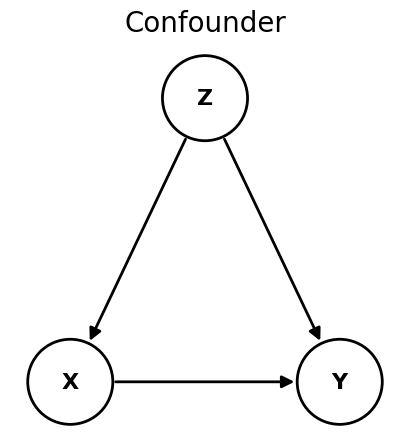

In [44]:
plt.rcParams["figure.facecolor"] = "white"

def unit_vec(p, q):
    v = np.array(q) - np.array(p)
    n = np.linalg.norm(v)
    return v / n if n > 0 else v

def shrink_segment(p, q, r):
    """
    Acorta el segmento p->q para que la flecha no entre a los círculos
    de radio r en ambos extremos.
    """
    p = np.array(p); q = np.array(q)
    u = unit_vec(p, q)
    return (p + r*u, q - r*u)

def draw_node(ax, xy, r=0.12, label="", lw=2):
    c = Circle(xy, r, facecolor="white", edgecolor="black", linewidth=lw)
    ax.add_patch(c)
    ax.text(xy[0], xy[1], label, ha="center", va="center", fontsize=16, fontweight="bold")

def draw_arrow(ax, p, q, r=0.12, lw=2):
    p2, q2 = shrink_segment(p, q, r)  # acorta para no pisar los nodos
    arr = FancyArrowPatch(
        p2, q2,
        arrowstyle="-|>", mutation_scale=18,
        linewidth=lw, color="black",
        connectionstyle="arc3,rad=0.0",  # recto; cambia rad si quieres curva
        zorder=3,
    )
    ax.add_patch(arr)

# --- Layout triangular (como tu imagen) ---
Z = (0.50, 0.90)
X = (0.12, 0.10)
Y = (0.88, 0.10)
R = 0.12  # radio de los nodos

fig, ax = plt.subplots(figsize=(4.2, 6))
ax.set_aspect("equal")
ax.axis("off")
ax.set_title("Confounder", fontsize=20, pad=10)

# Nodos (círculos)
draw_node(ax, Z, R, "Z")
draw_node(ax, X, R, "X")
draw_node(ax, Y, R, "Y")

# Flechas (ahora sí con punta)
draw_arrow(ax, Z, X, R)
draw_arrow(ax, Z, Y, R)
draw_arrow(ax, X, Y, R)

# Márgenes
ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 1.05)
plt.tight_layout()
plt.show()


2) Collider – Empleo formal y selección
- **X (causa 1):** Educación del trabajador.
- **Y (otra causa):** Redes/contactos laborales (empleabilidad no observada).
- **Z (colisionador):** Ser contratado en empleo formal.
- Condicionar en Z (analizar solo contratados) abre una asociación espuria entre X y Y.


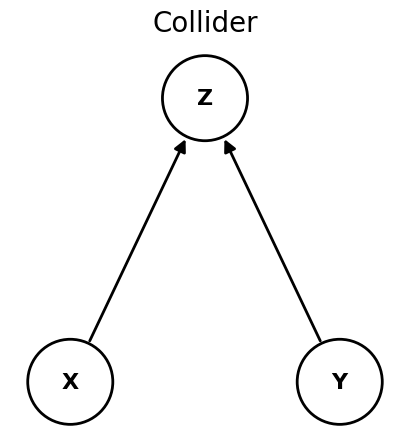

In [ ]:
plt.rcParams["figure.facecolor"] = "white"

# ---------- utilidades ----------
def unit_vec(p, q):
    v = np.array(q) - np.array(p)
    n = np.linalg.norm(v)
    return v / n if n > 0 else v

def shrink_segment(p, q, r):
    """Acorta p->q para que la flecha no invada los círculos (radio r)."""
    p = np.array(p); q = np.array(q)
    u = unit_vec(p, q)
    return (p + r*u, q - r*u)

def draw_node(ax, xy, r=0.12, label="", lw=2):
    c = Circle(xy, r, facecolor="white", edgecolor="black", linewidth=lw)
    ax.add_patch(c)
    ax.text(xy[0], xy[1], label, ha="center", va="center",
            fontsize=16, fontweight="bold")

def draw_arrow(ax, p, q, r=0.12, lw=2, rad=0.0):
    """Flecha desde p a q; rad>0 curva la flecha."""
    p2, q2 = shrink_segment(p, q, r)
    arr = FancyArrowPatch(
        p2, q2,
        arrowstyle="-|>", mutation_scale=18,
        linewidth=lw, color="black",
        connectionstyle=f"arc3,rad={rad}",
        zorder=3,
    )
    ax.add_patch(arr)

# ---------- layout (collider) ----------
X = (0.12, 0.10)
Y = (0.88, 0.10)
Z = (0.50, 0.90)
R = 0.12

fig, ax = plt.subplots(figsize=(4.2, 6))
ax.set_aspect("equal")
ax.axis("off")
ax.set_title("Collider", fontsize=20, pad=10)

# Nodos
draw_node(ax, X, R, "X")
draw_node(ax, Y, R, "Y")
draw_node(ax, Z, R, "Z")

# Flechas (collider: X -> Z <- Y)
draw_arrow(ax, X, Z, R)           # X -> Z
draw_arrow(ax, Y, Z, R)           # Y -> Z

# Márgenes
ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 1.05)
plt.tight_layout()
plt.show()


3) Mediator — Seguro de salud y salud preventiva
- **X (tratamiento):** Afiliación a seguro de salud público.
- **M (mediador):** Uso de servicios preventivos (controles, vacunas, chequeos).
- **Y (resultado):** Estado de salud / días de incapacidad.
- **Idea:** (X \rightarrow M \rightarrow Y). El seguro reduce barreras de precio y riesgo (**X**), lo que aumenta la prevención (**M**), y eso mejora la salud (**Y**).
  * Sin controlar **M** → **efecto total** de X sobre Y.
  * Controlando **M** → **efecto directo** (lo que no pasa por prevención) y separas el **efecto indirecto** vía **M**.


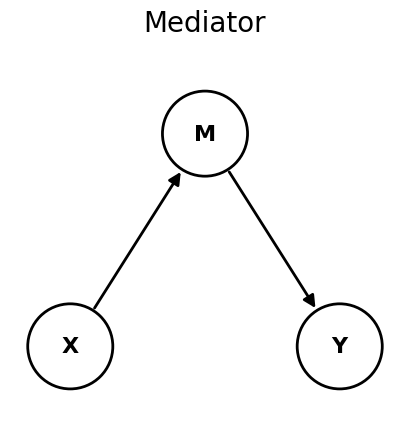

In [45]:
plt.rcParams["figure.facecolor"] = "white"

# ---------- utilidades ----------
def unit_vec(p, q):
    v = np.array(q) - np.array(p)
    n = np.linalg.norm(v)
    return v / n if n > 0 else v

def shrink_segment(p, q, r):
    """Acorta p->q para que la flecha no invada los círculos (radio r)."""
    p = np.array(p); q = np.array(q)
    u = unit_vec(p, q)
    return (p + r*u, q - r*u)

def draw_node(ax, xy, r=0.12, label="", lw=2):
    c = Circle(xy, r, facecolor="white", edgecolor="black", linewidth=lw)
    ax.add_patch(c)
    ax.text(xy[0], xy[1], label, ha="center", va="center",
            fontsize=16, fontweight="bold")

def draw_arrow(ax, p, q, r=0.12, lw=2, rad=0.0, style="-", color="black"):
    """Flecha desde p a q; rad>0 curva la flecha (por defecto recta)."""
    p2, q2 = shrink_segment(p, q, r)
    arr = FancyArrowPatch(
        p2, q2,
        arrowstyle="-|>", mutation_scale=18,
        linewidth=lw, color=color,
        connectionstyle=f"arc3,rad={rad}",
        linestyle=style, zorder=3,
    )
    ax.add_patch(arr)

# ---------- layout (mediator) ----------
X = (0.12, 0.20)   # izquierda
M = (0.50, 0.80)   # mediador arriba
Y = (0.88, 0.20)   # derecha
R = 0.12

fig, ax = plt.subplots(figsize=(4.2, 6))
ax.set_aspect("equal")
ax.axis("off")
ax.set_title("Mediator", fontsize=20, pad=10)

# Nodos
draw_node(ax, X, R, "X")
draw_node(ax, M, R, "M")
draw_node(ax, Y, R, "Y")

# Flechas del mediador: X -> M -> Y
draw_arrow(ax, X, M, R)           # X -> M
draw_arrow(ax, M, Y, R)           # M -> Y

# (OPCIONAL) efecto directo X -> Y (línea discontinua)
# draw_arrow(ax, X, Y, R, style="--", color="black")

ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 1.05)
plt.tight_layout()
plt.show()

## Part 1b - Simpson's paradox (2 points)

La **Paradoja de Simpson** ocurre cuando los datos agregados muestran una relación entre dos variables que se invierte completamente al separar por grupos por ejemplo podríamos encontrar que hacer más ejercicio se asocia con más colesterol, pero esto sería engañoso porque la edad actúa como factor oculto, las personas mayores hacen menos ejercicio y tienen más colesterol naturalmente mientras que los jóvenes hacen más ejercicio y tienen menos colesterol, al mezclar todas las edades se crea una falsa correlación positiva entre ejercicio y colesterol cuando en realidad dentro de cada grupo de edad la relación es negativa, esto demuestra por qué es peligroso sacar conclusiones de datos sin considerar factores que pueden estar influyendo en ambas variables simultáneamente.


In [36]:
# --- Simpson's paradox (grupos más cercanos/solapados, pooled negativa) ---

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def simular_con_negativo_cercano(max_tries=80):
    """
    Hace que A y B estén más cerca (más solapados) en X,
    pero ajusta el gap de interceptos para que la pendiente pooled sea negativa.
    """
    for seed in range(max_tries):
        rng = np.random.default_rng(500 + seed)

        nA, nB = 450, 450
        slope   = 0.55       # pendiente + dentro de grupo
        noise   = 0.45

        # >>> MÁS CERCA (medias más próximas y mayor desviación)
        muA, muB = 3.8, 5.2          # antes ~2.8 y 8.2
        sdA, sdB = 1.1, 1.1          # más anchos para solapar más

        # Interceptos: A (alto), B (bajo) => para forzar pooled negativa
        # Si no sale negativa al primer intento, probamos con ajustes pequeños.
        base_A, base_B = 5.6, 2.2     # gap moderado para no separarlos tanto en Y

        # Simulación
        xA = rng.normal(loc=muA, scale=sdA, size=nA)
        xB = rng.normal(loc=muB, scale=sdB, size=nB)

        yA = slope * xA + base_A + rng.normal(0, noise, size=nA)
        yB = slope * xB + base_B + rng.normal(0, noise, size=nB)

        df = pd.DataFrame({
            "x": np.r_[xA, xB],
            "y": np.r_[yA, yB],
            "group": np.r_[np.repeat("A", nA), np.repeat("B", nB)]
        })

        # Ajustes y = a*x + b
        a_A, b_A   = np.polyfit(df.loc[df.group=="A","x"], df.loc[df.group=="A","y"], 1)
        a_B, b_B   = np.polyfit(df.loc[df.group=="B","x"], df.loc[df.group=="B","y"], 1)
        a_all,b_all= np.polyfit(df["x"], df["y"], 1)

        if a_A > 0 and a_B > 0 and a_all < 0:
            return df, (a_A,b_A), (a_B,b_B), (a_all,b_all)

    raise RuntimeError(
        "No se logró pooled negativa con grupos muy cercanos. "
        "Sube un poco el gap de interceptos (base_A - base_B) o separa mínimamente muA/muB."
    )

# Simular
df, (a_A,b_A), (a_B,b_B), (a_all,b_all) = simular_con_negativo_cercano()

print(f"Slope A:   {a_A:.2f}  (> 0 ✓)")
print(f"Slope B:   {a_B:.2f}  (> 0 ✓)")
print(f"Slope ALL: {a_all:.2f}  (< 0 ✓)")

Slope A:   0.58  (> 0 ✓)
Slope B:   0.54  (> 0 ✓)
Slope ALL: -0.14  (< 0 ✓)


Slope A:   0.58  (>0 esperado)
Slope B:   0.54  (>0 esperado)
Slope ALL: -0.14 (<0 esperado)


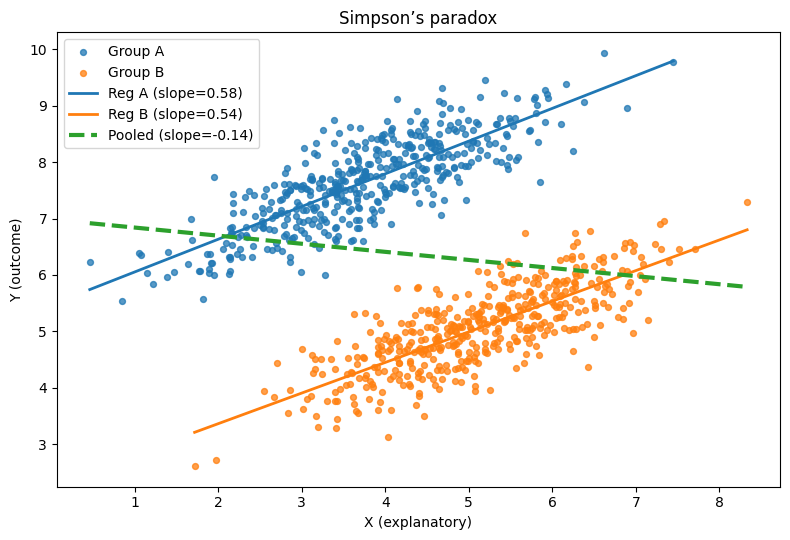

In [37]:
import numpy as np
import matplotlib.pyplot as plt

def fit_line(x, y):
    a, b = np.polyfit(x, y, 1)
    return a, b

maskA = df["group"]=="A"
a_A, b_A     = fit_line(df.loc[maskA,"x"],   df.loc[maskA,"y"])
a_B, b_B     = fit_line(df.loc[~maskA,"x"],  df.loc[~maskA,"y"])
a_all, b_all = fit_line(df["x"], df["y"])

print(f"Slope A:   {a_A:.2f}  (>0 esperado)")
print(f"Slope B:   {a_B:.2f}  (>0 esperado)")
print(f"Slope ALL: {a_all:.2f} (<0 esperado)")

fig, ax = plt.subplots(figsize=(8,5.5))
ax.scatter(df.loc[maskA,"x"],  df.loc[maskA,"y"], s=18, alpha=0.75, label="Group A")
ax.scatter(df.loc[~maskA,"x"], df.loc[~maskA,"y"], s=18, alpha=0.75, label="Group B")

def draw_line(ax, xvals, a, b, label, lw=2, style="-"):
    xs = np.linspace(xvals.min(), xvals.max(), 120)
    ax.plot(xs, a*xs + b, style, lw=lw, label=label)

draw_line(ax, df.loc[maskA,"x"],  a_A,   b_A,   f"Reg A (slope={a_A:.2f})")
draw_line(ax, df.loc[~maskA,"x"], a_B,   b_B,   f"Reg B (slope={a_B:.2f})")
draw_line(ax, df["x"],            a_all, b_all, f"Pooled (slope={a_all:.2f})", lw=3, style="--")

ax.set_xlabel("X (explanatory)")
ax.set_ylabel("Y (outcome)")
ax.set_title("Simpson’s paradox")
ax.legend()
plt.tight_layout()
plt.show()
